## Advantages

### More Accurate

Dual derivative: -1.9612372705533612
Analytical derivative: -1.9612372705533612
Numerical derivative: -1.9612723090589588


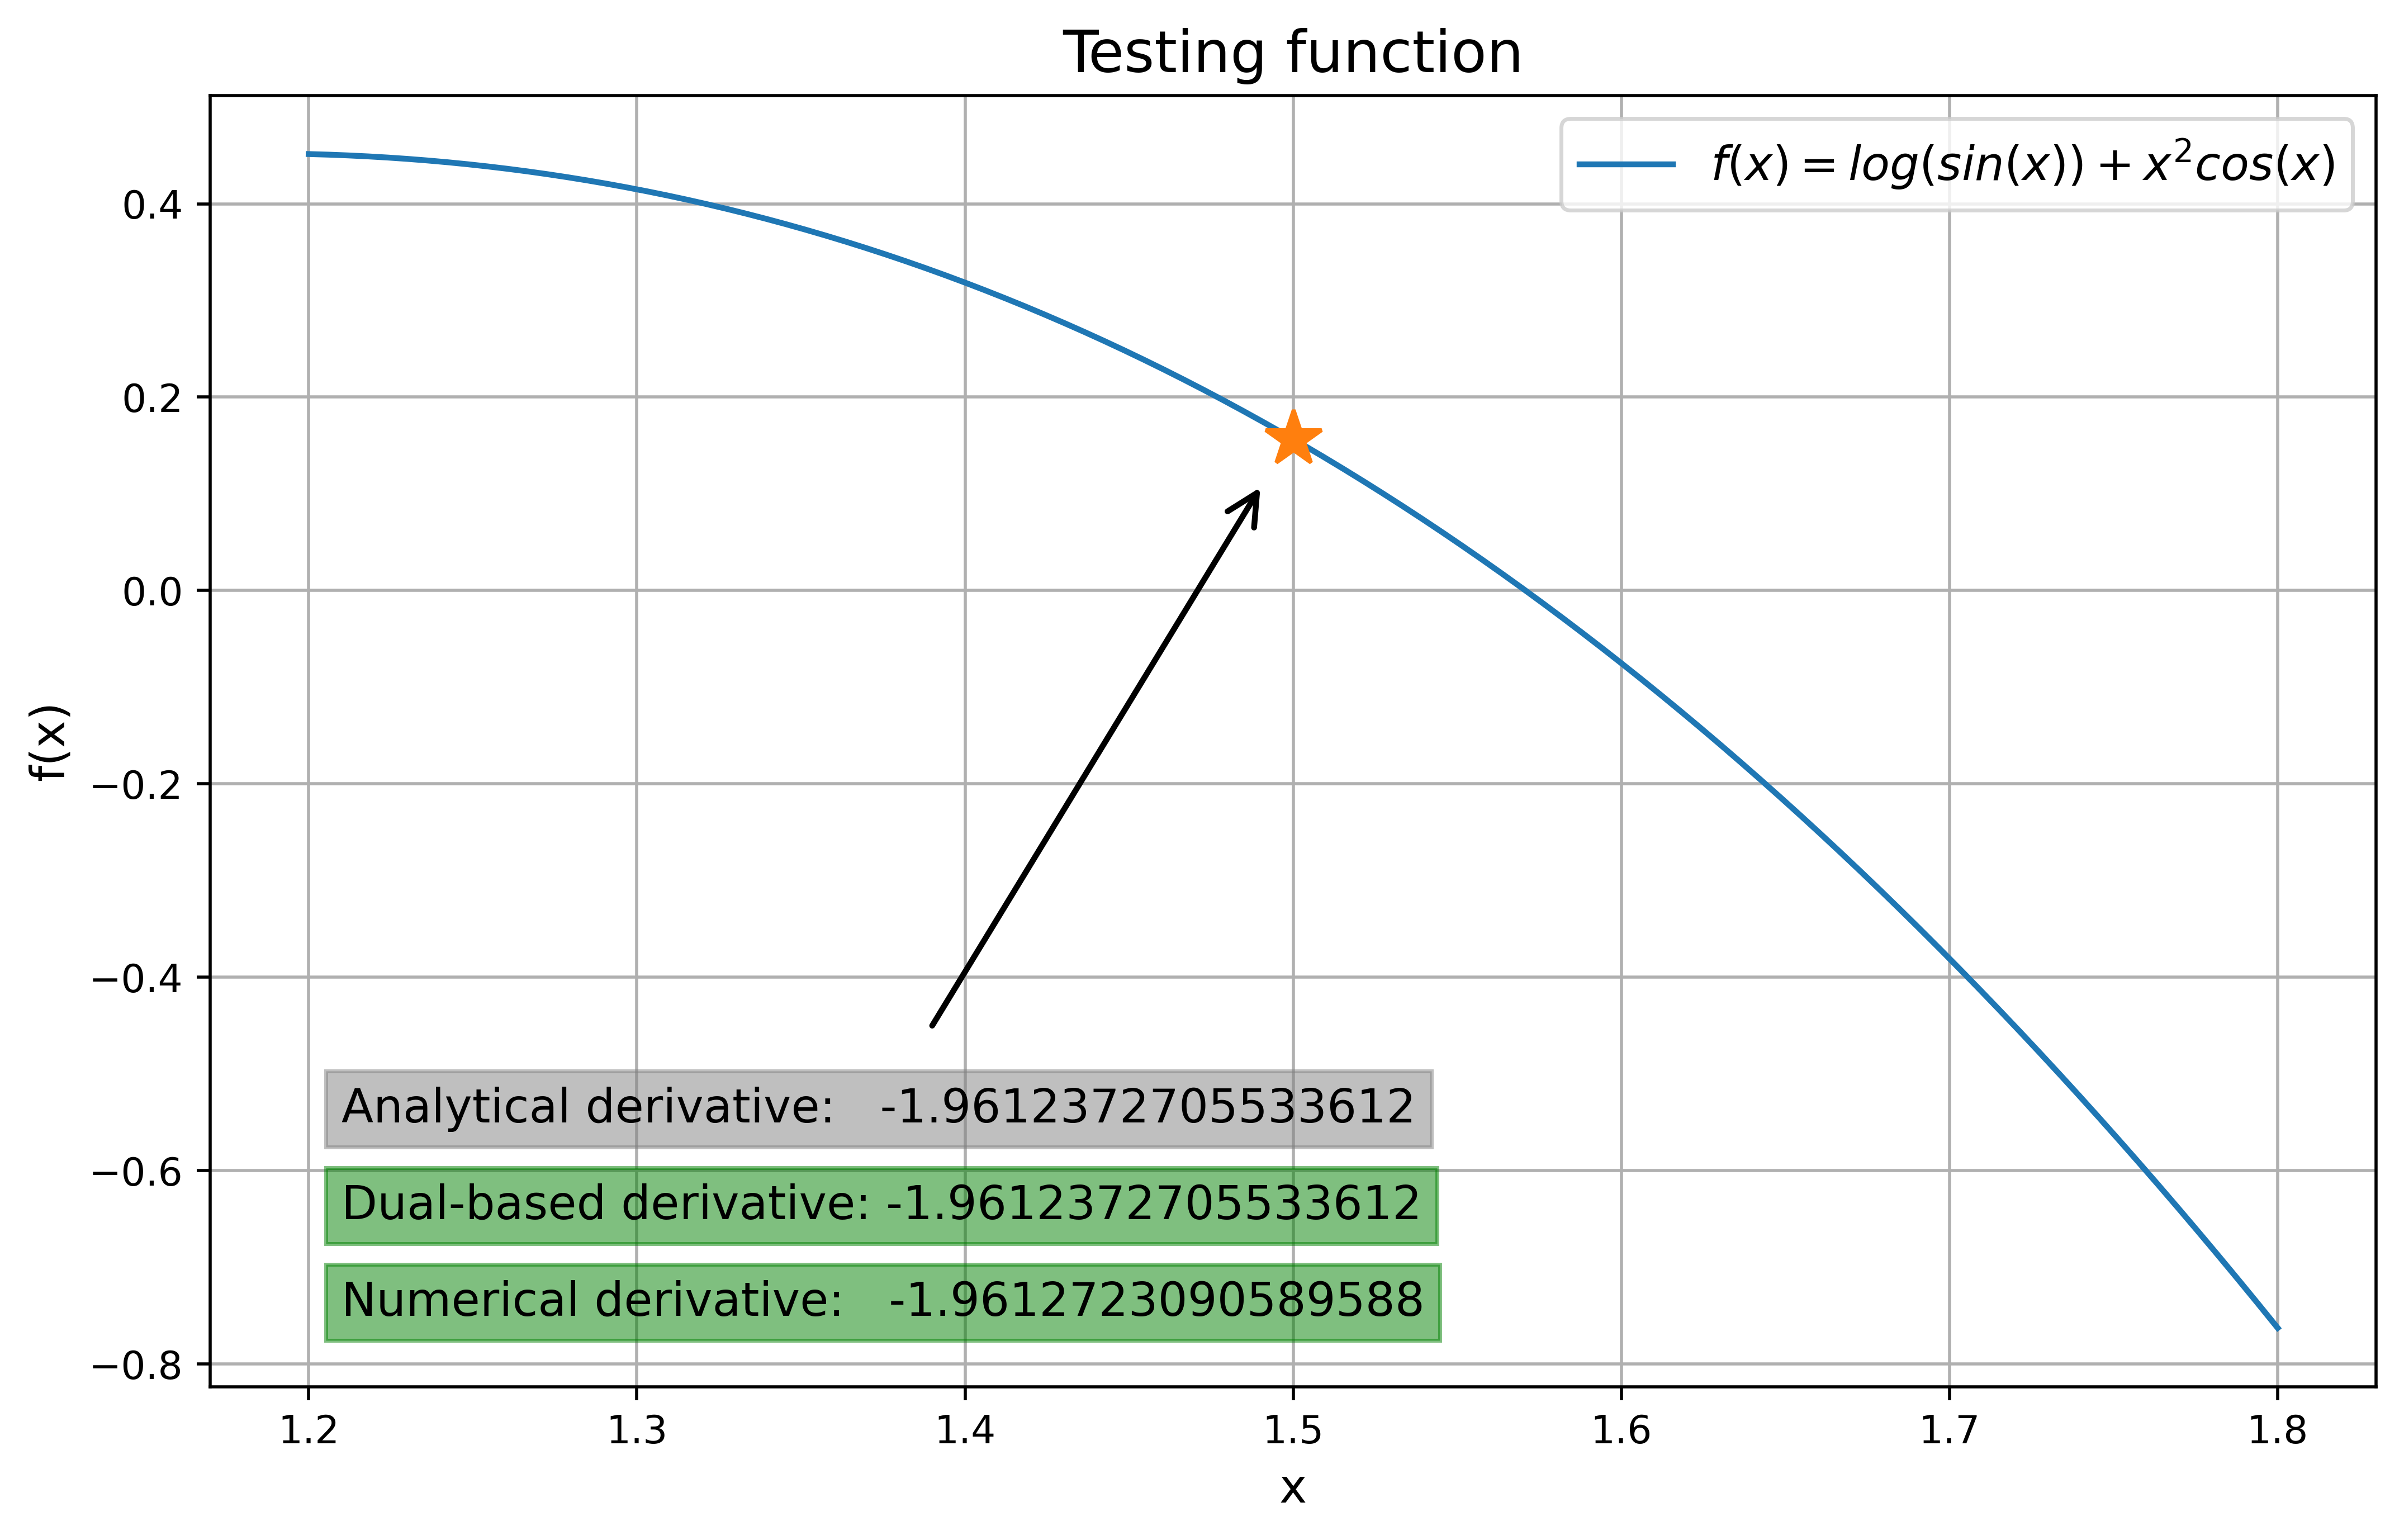

In [2]:
### set derivative methods with Dual, numerical one and analytical one
import numpy as np
import matplotlib.pyplot as plt
from dual_autodiff import Dual

def f(x):
    """
    f(x) = log(sin(x)) + x^2 * cos(x)

    parameter: x: An input variable (can be a true number or a Dual)
    return: Function value of x 
    """
    if isinstance(x, Dual):
        return x.sin().log() + x**2 * x.cos()
    return np.log(np.sin(x)) + x**2 * np.cos(x)


def forward_mode_diff(func, x):
    '''
    A forward mode automatic differentiation method
    parameters:
        func:   Objective function, should be constructed by the mathematical operations in class 'Dual'
        x:      A scalar, indicating where you need to differentiate
    return: func derivative value at x
    '''
    x_dual = Dual(x, 1) 
    result = func(x_dual)  
    return result.dual 

# analytical solution
def analytical_derivative(x):
    return (np.cos(x) / np.sin(x)) + 2 * x * np.cos(x) - x**2 * np.sin(x)

# numerical solution
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x)) / h

# compare the results from three different derivative methods at x = 1.5
x_val = 1.5

dual_result = forward_mode_diff(f, x_val)
analytical_result = analytical_derivative(x_val)
numerical_result = numerical_derivative(f, x_val)

print(f"Dual derivative: {dual_result}")
print(f"Analytical derivative: {analytical_result}")
print(f"Numerical derivative: {numerical_result}")

x = np.linspace(1.2, 1.8, 100)

plt.figure(figsize=(10, 6), dpi = 500)
plt.plot(x, f(x), label="$f(x) = log(sin(x)) + x^2 cos(x)$")
plt.plot(1.5, f(1.5), marker='*', markersize=15)
plt.xlabel("x",fontsize=12)
plt.ylabel("f(x)",fontsize=12)
plt.text(1.21, -0.55, f"Analytical derivative:   {analytical_result}", fontsize=12, color="black",
         bbox=dict(facecolor="grey", alpha=0.5, edgecolor="grey"))
plt.text(1.21, -0.65, f"Dual-based derivative: {dual_result}", fontsize=12, color="black",
         bbox=dict(facecolor="g", alpha=0.5, edgecolor="g"))
plt.text(1.21, -0.75, f"Numerical derivative:   {numerical_result}", fontsize=12, color="black",
         bbox=dict(facecolor="g", alpha=0.5, edgecolor="g"))


plt.annotate(text="", xy=(1.49, f(1.5)-0.05), xytext=(1.39, -0.45), 
             arrowprops=dict(facecolor="black", arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, mutation_scale=20))

plt.title("Testing function",fontsize = 15)
plt.legend( fontsize = 12)
plt.grid(True)
plt.show()

### More Stable

In [ ]:
### compare to analytical derivative at x = 1.5

from ipywidgets import interactive
import ipywidgets as widgets

def plot_with_parameters(min, max):
    x_vals = 1.5
    step_size = 1e-9 * np.linspace(min, max, 1000)
    num_bias = [numerical_derivative(f, x_vals, ss) for ss in step_size] - analytical_result
    dual_bias = dual_result - analytical_result

    plt.figure(figsize=(10, 6), dpi = 500)
    plt.plot(step_size, num_bias, label="Bias of numerical method")
    plt.gca().invert_xaxis()
    plt.hlines(dual_bias, step_size[0], step_size[-1], colors='r', label='Bias of dual method')
    plt.xlabel("step size")
    plt.ylabel("bias from analytical derivative at x = 1.5")
    plt.title("Comparison of Derivative Methods")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    max=widgets.FloatSlider(min=10, max=1000, step=0.01, value=10),
    min=widgets.FloatSlider(min=0.01, max=1, step=0.01, value=1),
)

display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='min', max=1.0, min=0.01, step=0.01), FloatSlider(val…

### Faster

In [3]:
import timeit
from dual_autodiff import Dual as pDual
from dual_autodiff_x import Dual as cDual

def forward_mode_diff_pure(func, x):
    result = func(pDual(x, 1))  
    return result.dual 

def forward_mode_diff_cy(func, x):
    result = func(cDual(x, 1))
    return result.get_dual()  

def f(x):
    """
    f(x) = log(sin(x)) + x^2 * cos(x)

    parameter: x: An input variable (can be a true number or a Dual)
    return: Function value of x 
    """
    if isinstance(x, cDual):
        return x.sin().log() + x.pow(2) * x.cos()
    if isinstance(x, pDual):
        return x.sin().log() + x**2 * x.cos()
    return np.log(np.sin(x)) + x**2 * np.cos(x)


def test_pure():
    forward_mode_diff_pure(f, 3)

def test_cy():
    forward_mode_diff_cy(f, 3)

def test_num():
    numerical_derivative(f, 3)
    

# record the run times
pure_time = timeit.timeit(test_pure, number=100000)
cy_time = timeit.timeit(test_cy, number=100000)
num_time = timeit.timeit(test_num, number=100000)

print('The numerical, python, cython results are:')
print(numerical_derivative(f, 3))
print(forward_mode_diff_pure(f, 3))
print(forward_mode_diff_cy(f, 3))
print('\n')
print('The run times comparison:')
print(f"numerical derivative time: {num_time:.4f} seconds")
print(f"Pure Python time:          {pure_time:.4f} seconds")
print(f"optimised Cython time:     {cy_time:.4f} seconds")

The numerical, python, cython results are:
-14.225512501475633
-14.225287603576012
-14.225287603576012


The run times comparison:
numerical derivative time: 0.4197 seconds
Pure Python time:          0.1499 seconds
optimised Cython time:     0.0662 seconds
